# Logistic Regression on MNIST

Simple example of applying logistic regression to the MNIST dataset using TensorFlow.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Load MNIST dataset using Google's `input_data` file from: https://tensorflow.googlesource.com/tensorflow/+/master/tensorflow/g3doc/tutorials/mnist/input_data.py

In [2]:
import input_data # https://tensorflow.googlesource.com/tensorflow/+/master/tensorflow/g3doc/tutorials/mnist/input_data.py
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Startup a TF session

In [3]:
import tensorflow as tf
s = tf.InteractiveSession()

Create `placeholder` variables that will be fed  data and labels

In [4]:
x = tf.placeholder(tf.float32, shape=(None, 784))
y = tf.placeholder(tf.float32, shape=(None, 10))

Define parameters

In [5]:
W = tf.Variable(tf.truncated_normal((784, 10)), name="W")
b = tf.Variable(tf.truncated_normal((10,)), name="b")

Compute the scores for each class:

In [6]:
yhat = tf.matmul(x, W) + b

Typical cost function with L2 weight decay so that filters are more interpretable. 

In [7]:
weight_decay_penalty = 0.01
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(yhat, y)) + weight_decay_penalty * tf.nn.l2_loss(W)

Create a ``train_step`` op that computes the gradients and applies updates to all variables that influence `cost`

In [8]:
lr = 0.001
train_step = tf.train.AdamOptimizer(lr).minimize(cost)

Initialize variables. Note that Adam creates additional variables, so this must be run after the training op is created, but before it is used.

In [9]:
s.run(tf.initialize_all_variables())

Train the model!

In [10]:
%%time
loss = []
iters = 5000
for i in xrange(iters):
    batch = mnist.train.next_batch(50)
    #train_step.run({x: batch[0], y_: batch[1]})
    _, l = s.run([train_step, cost], {x: batch[0], y: batch[1]})
    loss.append(l)

CPU times: user 22 s, sys: 5.6 s, total: 27.6 s
Wall time: 13.1 s


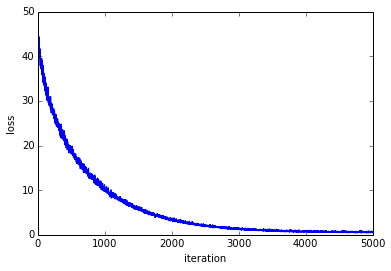

In [11]:
plot(loss)
xlabel('iteration')
ylabel('loss')

Create op to compute prediciton accuracy

In [12]:
# Some ugly casting in here as in_top_k does not work with int64 and reduce_mean does not work with bool.
accuracy = tf.reduce_mean(tf.cast(tf.nn.in_top_k(yhat, tf.cast(tf.argmax(y, 1), 'int32'), 1), "float32"))

Evaluate prediction accuracy on the test set:

In [13]:
teX, teY = mnist.test.images, mnist.test.labels
test_accuracy = s.run(accuracy, {x: teX, y: teY})
print 'Test accuracy', test_accuracy

Test accuracy 0.9084


Finally, we visualize the weights for each digit:

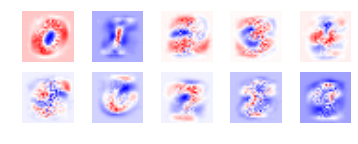

In [14]:
w = W.eval().reshape(28, 28, -1)
figure(figsize=(6,2))
for i in xrange(10):
    subplot(2, 5, i + 1)
    imshow(w[..., i], cmap=cm.bwr)
    axis('off')